In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
from scipy.interpolate import interp1d
import seaborn.objects as so

In [2]:
cancellations_scotland_fp = os.path.join(os.getcwd(), "datasets", "cancellations_in_scotland.csv")
cancellations_scotland = pd.read_csv(cancellations_scotland_fp)

cancellations_hospital_fp = os.path.join(os.getcwd(), "datasets", "cancellations_by_hospital.csv")
cancellations_hospital = pd.read_csv(cancellations_hospital_fp)

cancellations_hb_fp = os.path.join(os.getcwd(), "datasets", "cancellations_by_hb.csv")
cancellations_hb = pd.read_csv(cancellations_hb_fp)

hospital_names_fp = os.path.join(os.getcwd(), "datasets", "hospitals_scotland.csv")
hospital_names = pd.read_csv(hospital_names_fp)

hb_names_fp = os.path.join(os.getcwd(), "datasets", "hb_names.xlsx")
hb_names = pd.read_excel(hb_names_fp)

specialhb_names_fp = os.path.join(os.getcwd(), "datasets", "specialhb_name.csv")
specialhb_names = pd.read_csv(specialhb_names_fp)

In [3]:
cancellations_scotland.isna().sum()

_id                              0
Month                            0
Country                          0
TotalOperations                  0
TotalOperationsQF              105
TotalCancelled                   0
TotalCancelledQF               105
CancelledByPatientReason         0
CancelledByPatientReasonQF     105
ClinicalReason                   0
ClinicalReasonQF               105
NonClinicalCapacityReason        0
NonClinicalCapacityReasonQF    105
OtherReason                      0
OtherReasonQF                  105
dtype: int64

In [4]:
cancellations_hb.isna().sum()

_id                               0
Month                             0
HBT                               1
TotalOperations                   0
TotalOperationsQF              1575
TotalCancelled                    0
TotalCancelledQF               1575
CancelledByPatientReason          0
CancelledByPatientReasonQF     1575
ClinicalReason                    0
ClinicalReasonQF               1575
NonClinicalCapacityReason         0
NonClinicalCapacityReasonQF    1575
OtherReason                       0
OtherReasonQF                  1575
dtype: int64

In [5]:
cancellations_hospital.isna().sum()

_id                               0
Month                             0
Hospital                          0
TotalOperations                   0
TotalOperationsQF              4502
TotalCancelled                    0
TotalCancelledQF               4502
CancelledByPatientReason          0
CancelledByPatientReasonQF     4502
ClinicalReason                    0
ClinicalReasonQF               4502
NonClinicalCapacityReason         0
NonClinicalCapacityReasonQF    4502
OtherReason                       0
OtherReasonQF                  4502
dtype: int64

In [6]:
# Dropping columns where all the rows have Nan
cancellations_hospital.drop(columns=["TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)
cancellations_scotland.drop(columns=["TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)
cancellations_hb.drop(columns=["TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)

In [7]:
cancellations_hb.groupby("HBT").sum()
#SB0801 is a special health board, Golden Jubilee University National Hospital

,_id,Month,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
HBT,,,,,,,,
S08000015,82005,21202293,152999,15721,4809,6991,3072,849
S08000016,82110,21202293,34069,3477,888,807,1731,51
S08000017,82215,21202293,143662,12470,3952,5540,2369,606
S08000019,82320,21202293,96995,9021,3238,3143,2190,450
S08000020,82425,21202293,261396,24103,8417,7640,6848,1198
S08000022,82530,21202293,110080,13865,5039,3812,4928,86
S08000024,82635,21202293,449077,48812,21047,14042,10454,3269
S08000025,82740,21202293,24913,1976,745,364,639,228
S08000026,82845,21202293,17133,1119,507,353,244,15


In [8]:
# exactly 15 health board for each month
len(cancellations_hb[cancellations_hb["HBT"] == "SB0801"])
# SB0801 has a missing month 202308 but it seems that there is a missing 202308 hbt name so presumed it is for HBT SB0801

cancellations_hb.info() 
# confirmed that there is a missing name for the HBT which i presume will be for HBT SB0801

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _id                        1575 non-null   int64 
 1   Month                      1575 non-null   int64 
 2   HBT                        1574 non-null   object
 3   TotalOperations            1575 non-null   int64 
 4   TotalCancelled             1575 non-null   int64 
 5   CancelledByPatientReason   1575 non-null   int64 
 6   ClinicalReason             1575 non-null   int64 
 7   NonClinicalCapacityReason  1575 non-null   int64 
 8   OtherReason                1575 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 110.9+ KB


In [9]:
# Changing the nan value for the missing month for SB0801
cancellations_hb.loc[1499,"HBT"] = "SB0801"

In [10]:
# Checking that the value of the missing hbt name has been changed
cancellations_hb[(cancellations_hb["Month"] == 202308)]

,_id,Month,HBT,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
1485,1486,202308,S08000015,1433,116,20,54,39,3
1486,1487,202308,S08000016,347,28,8,6,14,0
1487,1488,202308,S08000017,1509,168,60,63,37,8
1488,1489,202308,S08000019,1011,90,25,33,26,6
1489,1490,202308,S08000020,2251,198,71,67,49,11
1490,1491,202308,S08000022,1149,88,27,29,32,0
1491,1492,202308,S08000024,4145,479,203,145,128,3
1492,1493,202308,S08000025,297,52,20,11,9,12
1493,1494,202308,S08000026,191,19,6,4,8,1
1494,1495,202308,S08000028,119,8,2,1,4,1


In [11]:
cancellations_hb.HBT.value_counts()
# yep now so all the HBT have 105 months 

S08000015    105
S08000016    105
S08000017    105
S08000019    105
S08000020    105
S08000022    105
S08000024    105
S08000025    105
S08000026    105
S08000028    105
S08000029    105
S08000030    105
S08000031    105
S08000032    105
SB0801       105
Name: HBT, dtype: int64

In [12]:
cancellations_hb["Month"] = pd.to_datetime(cancellations_hb.Month, format="%Y%m")
cancellations_hospital["Month"] = pd.to_datetime(cancellations_hospital.Month, format="%Y%m")
cancellations_scotland["Month"] = pd.to_datetime(cancellations_scotland.Month, format="%Y%m")

In [13]:
# no duplication in the months, there exist only one month 
(cancellations_scotland.Month.value_counts() > 1).sum()
# I believe everything is cleaned up for this dataset

0

In [14]:
#pd.set_option('display.max_rows', None)
len(cancellations_hospital.Hospital.value_counts()[cancellations_hospital.Hospital.value_counts() == 105])
#Only 49 hospitals, where there are 276 hospitals in Scotland, so a small data size and not all of the hospitals have full 105 months

30

In [15]:
print(cancellations_hospital.Month.value_counts())
# how many hospital data available each month

2024-01-01    44
2018-05-01    44
2019-07-01    44
2019-06-01    44
2019-05-01    44
              ..
2022-04-01    42
2021-10-01    41
2020-06-01    38
2020-05-01    36
2020-04-01    35
Name: Month, Length: 105, dtype: int64


In [16]:
specialhb_names

,_id,SHB,SHBName,Country
0,1,SB0801,The Golden Jubilee National Hospital,S92000003
1,2,SB0802,State Hospitals Board for Scotland,S92000003
2,3,SB0803,NHS24,S92000003
3,4,SB0804,NHS Health Scotland,S92000003
4,5,SB0805,Healthcare Improvement Scotland,S92000003
5,6,SB0806,Scottish Ambulance Service,S92000003
6,7,SB0807,NHS Education for Scotland,S92000003
7,8,SB0808,NHS National Services Scotland,S92000003
8,9,SN0811,National Facility NHS Louisa Jordan,S92000003


In [17]:
hb_names

,HB21CD,HB21CDS,HB21NM
0,S08000015,SA9,Ayrshire and Arran
1,S08000016,SB9,Borders
2,S08000017,SY9,Dumfries and Galloway
3,S08000019,SV9,Forth Valley
4,S08000020,SN9,Grampian
5,S08000022,SH9,Highland
6,S08000024,SS9,Lothian
7,S08000025,SR9,Orkney
8,S08000026,SZ9,Shetland
9,S08000028,SW9,Western Isles


In [18]:
# cleaning hb_names and specialhb_names
hb_names.rename(columns={"HB21CD":"Health Board Code", "HB21NM":"Health Board"},inplace=True)
specialhb_names.rename(columns={"SHB":"Health Board Code","SHBName":"Health Board"},inplace=True)
specialhb_names.drop(columns=["_id","Country"],inplace=True)
hb_names.drop(columns=["HB21CDS"], inplace=True)


In [19]:
hb_names_all = pd.concat([hb_names,specialhb_names])
hb_names_all

,Health Board Code,Health Board
0,S08000015,Ayrshire and Arran
1,S08000016,Borders
2,S08000017,Dumfries and Galloway
3,S08000019,Forth Valley
4,S08000020,Grampian
5,S08000022,Highland
6,S08000024,Lothian
7,S08000025,Orkney
8,S08000026,Shetland
9,S08000028,Western Isles


In [20]:
cancellations_hb = cancellations_hb.merge(hb_names_all, on="Health Board Code")
cancellations_hb.rename(columns={"HBT":"Health Board Code","HB_Name":"Health Board"},inplace=True)
cancellations_hb

KeyError: 'Health Board Code'

<Axes: xlabel='Month', ylabel='TotalCancelled'>

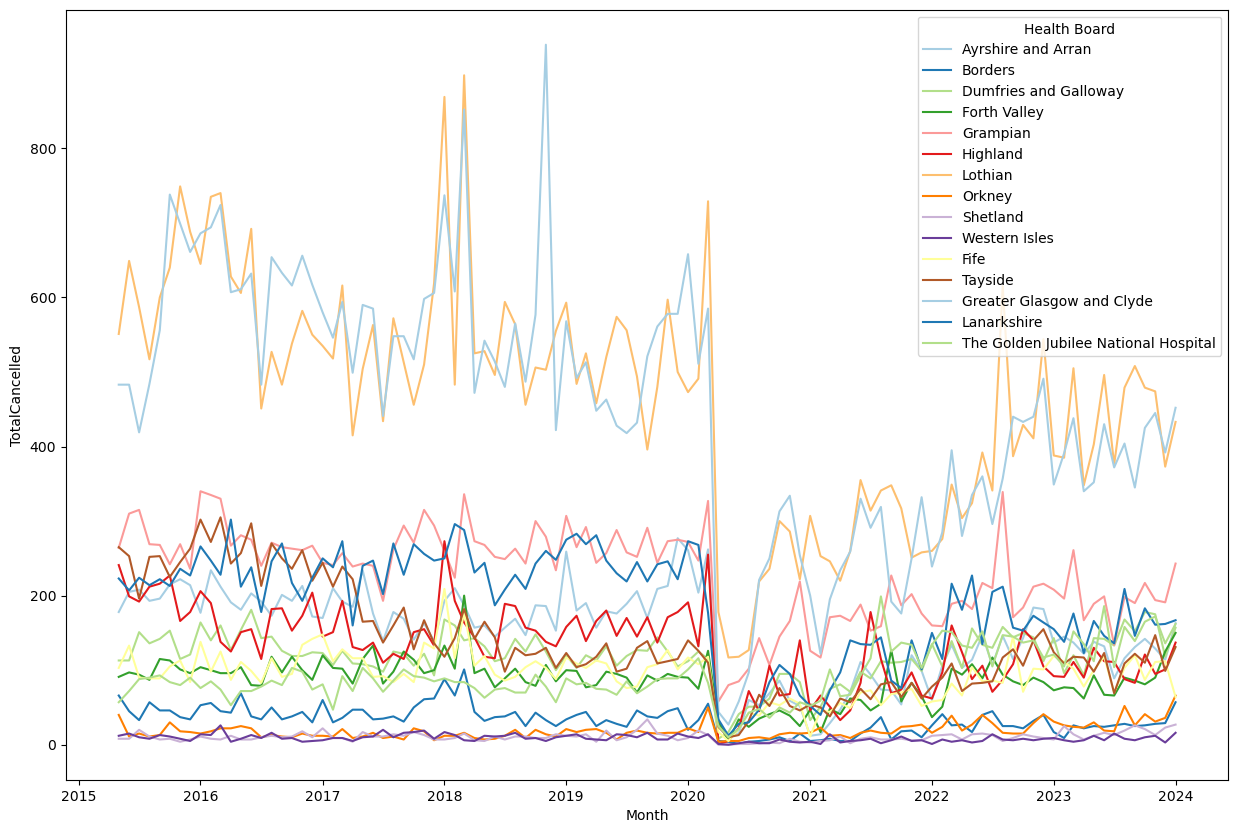

In [ ]:
plt.subplots(figsize = (15,10))
sns.lineplot(palette="Paired",data = cancellations_hb, x = "Month", y = "TotalCancelled", hue = "Health Board")
# plt.plot(cancellations_hb[cancellations_hb["Health Board"] == "Lothian"]["Month"],cancellations_hb[cancellations_hb["Health Board"] == "Lothian"]["TotalCancelled"].rolling(5).mean(), label = "ROlling")
# seems like the plot is too janky so lets smooth it out
# it also looks like there is a spike during or around winter something special?

In [ ]:
grouped_hb = cancellations_hb.groupby(["Health Board","Month"]).sum()
grouped_hb

KeyError: 'Health Board'

NameError: name 'grouped_hb' is not defined

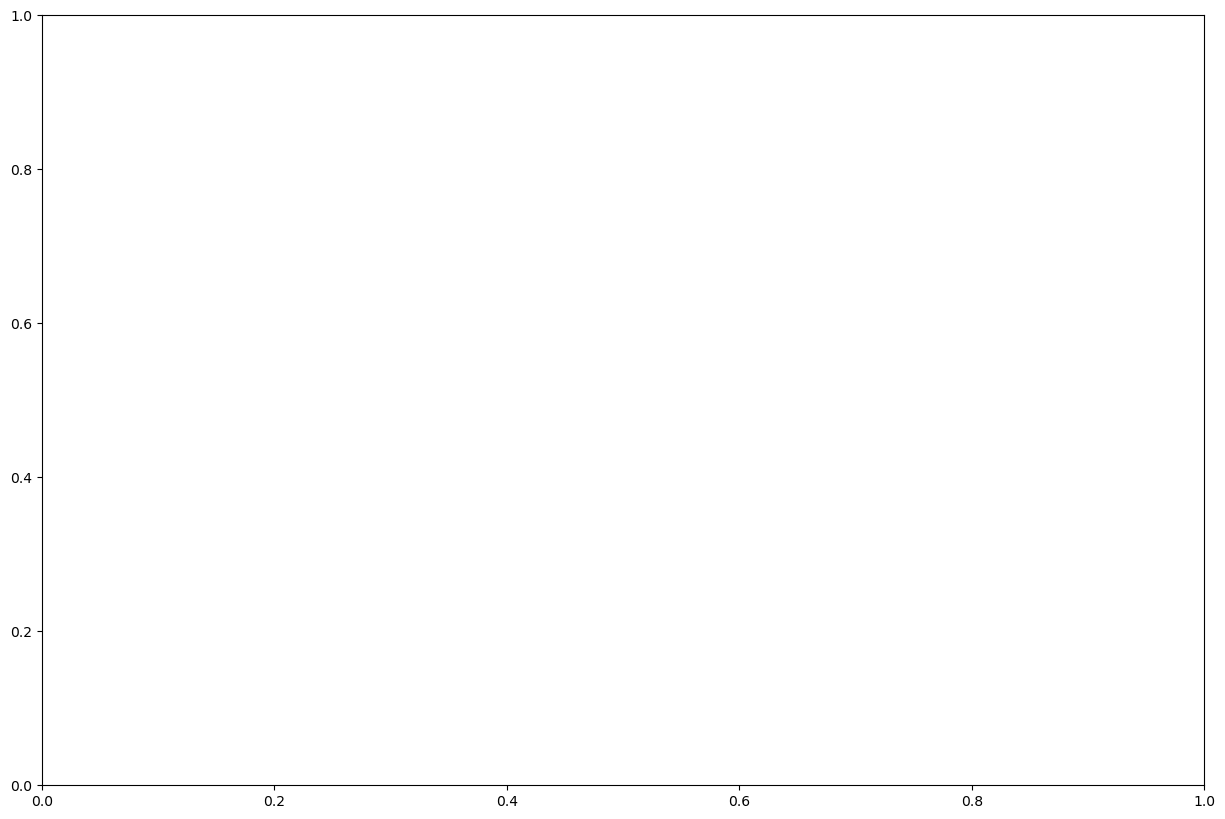

In [ ]:
plt.subplots(figsize = (15,10))
sns.lineplot(palette="Paired",data = grouped_hb, x = "Month", y = "TotalOperations", hue = "Health Board")

NameError: name 'grouped_hb' is not defined

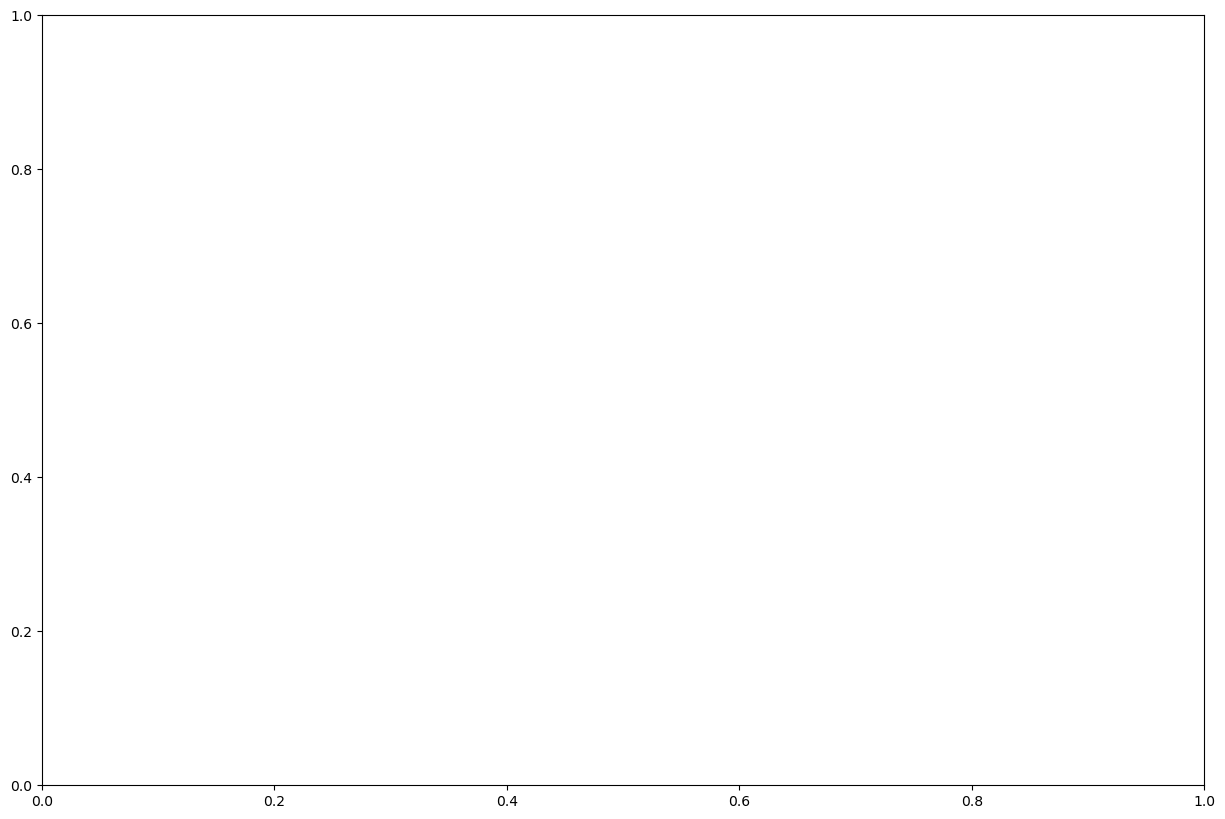

In [ ]:
plt.subplots(figsize = (15,10))
sns.lineplot(palette="Paired",data = grouped_hb, x = "Month", y = "CancelledByPatientReason", hue = "Health Board")

NameError: name 'grouped_hb' is not defined

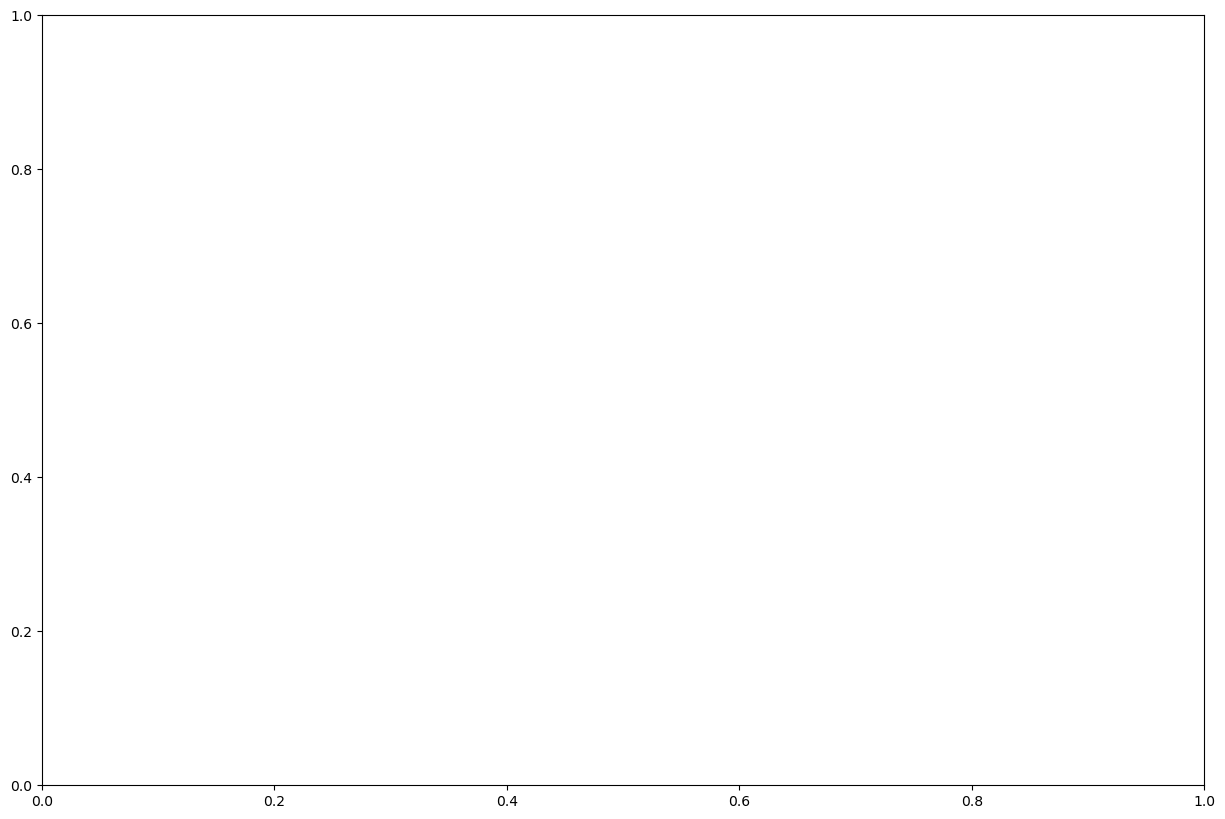

In [ ]:
plt.subplots(figsize = (15,10))
sns.lineplot(palette="Paired",data = grouped_hb, x = "Month", y = "ClinicalReason", hue = "Health Board")

NameError: name 'grouped_hb' is not defined

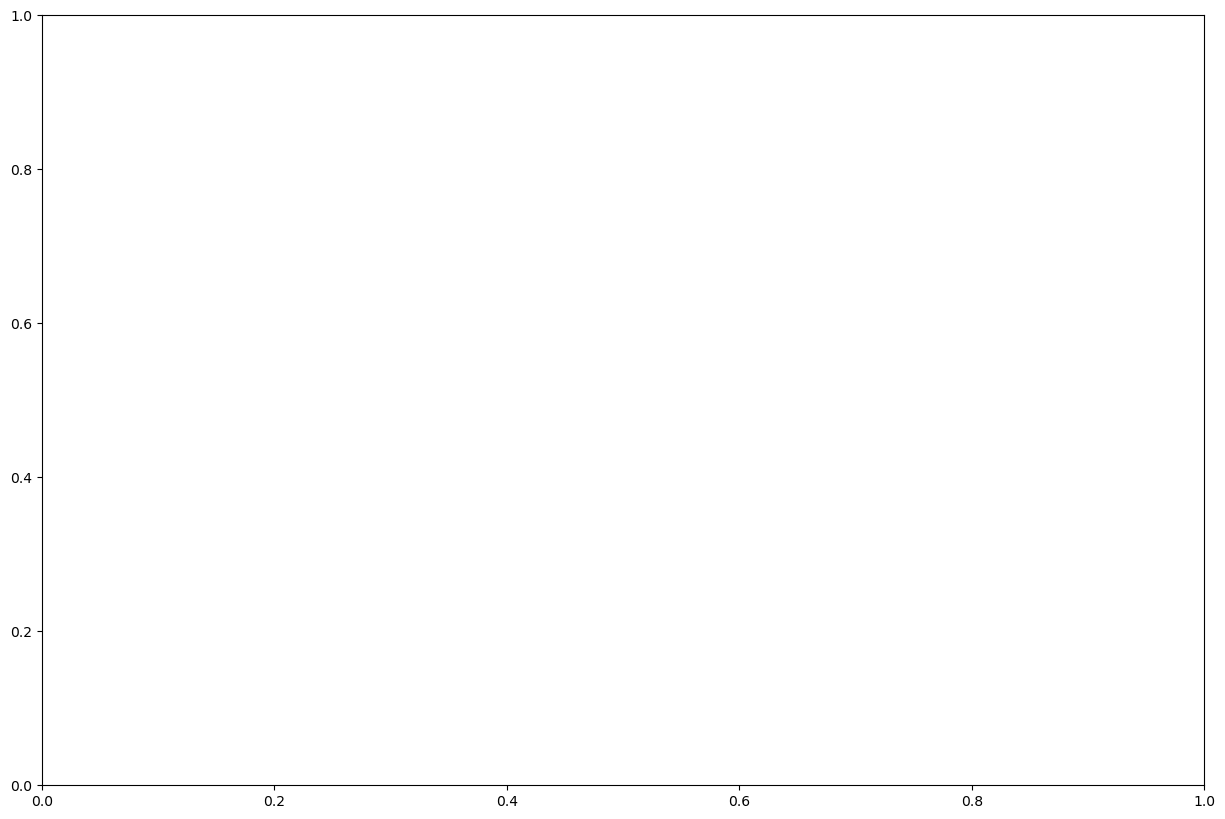

In [ ]:
plt.subplots(figsize = (15,10))
sns.lineplot(palette="Paired",data = grouped_hb, x = "Month", y = "NonClinicalCapacityReason", hue = "Health Board")

NameError: name 'grouped_hb' is not defined

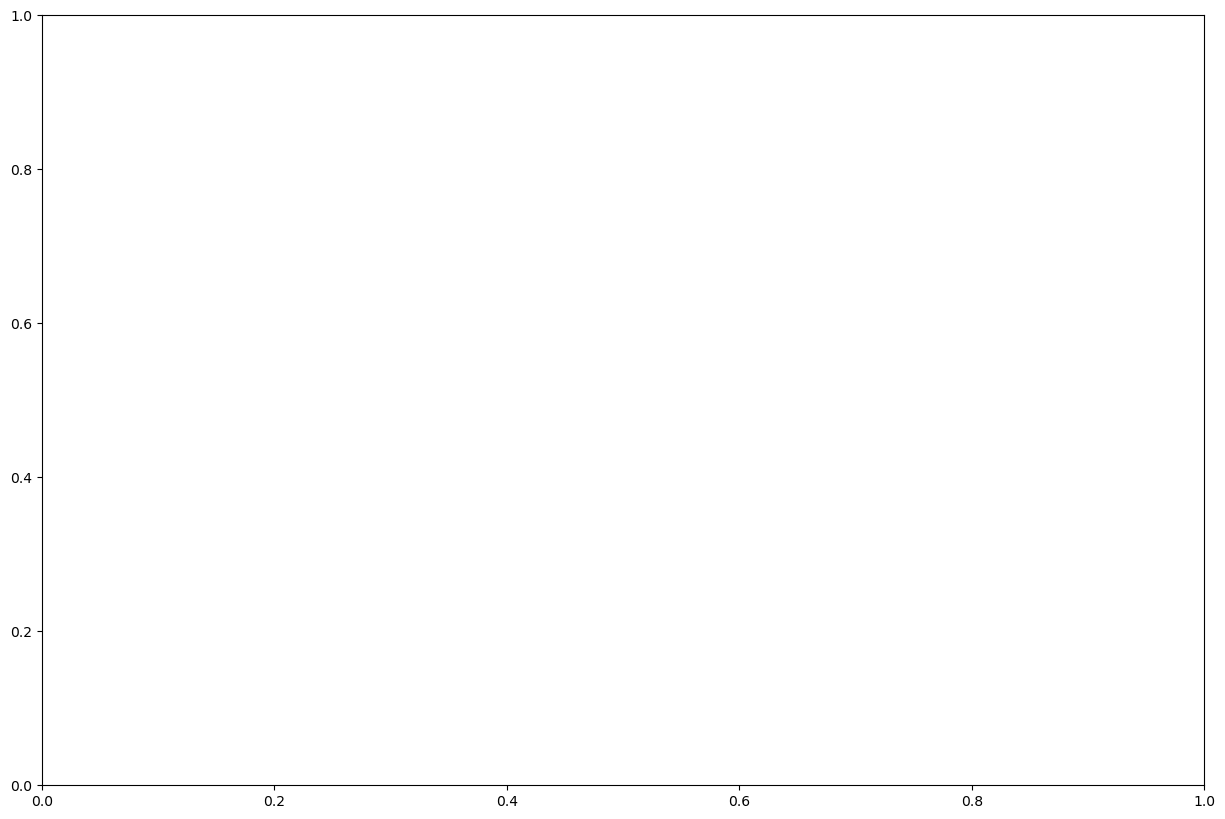

In [ ]:
plt.subplots(figsize = (15,10))
sns.lineplot(palette="Paired",data = grouped_hb, x = "Month", y = "OtherReason", hue = "Health Board")

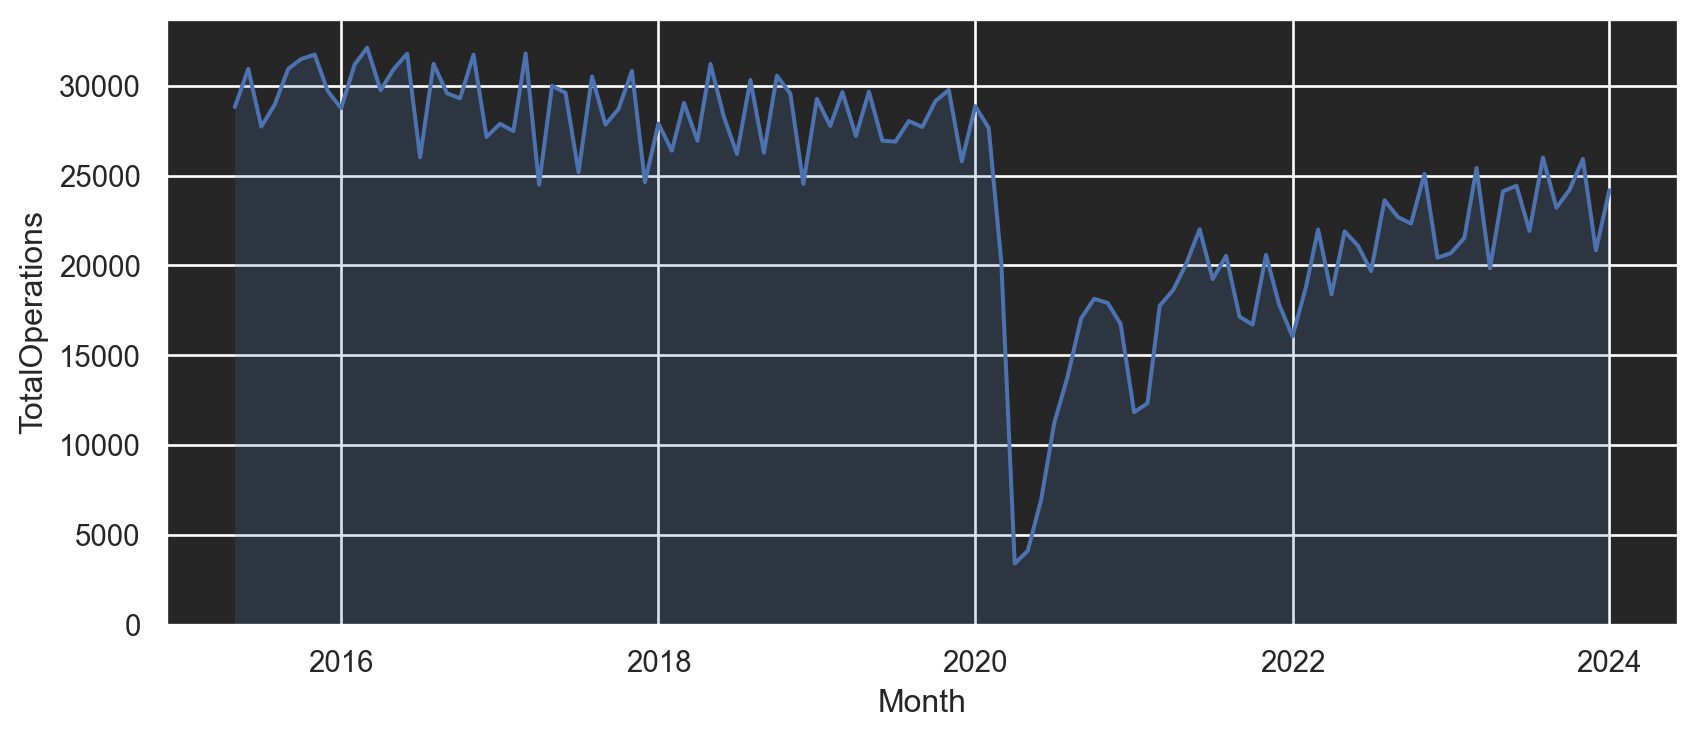

In [21]:
scot = so.Plot(cancellations_scotland, "Month", "TotalOperations").layout(size=(9, 4)).theme({"axes.facecolor": "k"})
scot.add(so.Area(edgewidth=0)).add(so.Line())


In [22]:
def get_season(x):
    match x.month:
        case 12 | 1 | 2:
            return "Winter"
        case 3 | 4 | 5:
            return "Spring"
        case 6 | 7 | 8:
            return "Summer"
        case 9 | 10 | 11:
            return "Autumn"
        
cancel_scotland = cancellations_scotland.copy(True)
cancel_scotland["Season"] = cancellations_scotland["Month"].apply(get_season)
cancel_scotland


,_id,Month,Country,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Season
0,1,2015-05-01,S92000003,28810,2695,1057,853,523,262,Spring
1,2,2015-06-01,S92000003,30941,2800,1194,870,449,287,Summer
2,3,2015-07-01,S92000003,27725,2642,1083,854,457,248,Summer
3,4,2015-08-01,S92000003,28948,2630,1080,912,491,147,Summer
4,5,2015-09-01,S92000003,30938,2829,1122,1000,535,172,Autumn
...,...,...,...,...,...,...,...,...,...,...
100,101,2023-09-01,S92000003,23209,2105,739,738,541,87,Autumn
101,102,2023-10-01,S92000003,24201,2286,775,797,580,134,Autumn
102,103,2023-11-01,S92000003,25922,2277,737,820,582,138,Autumn
103,104,2023-12-01,S92000003,20837,2014,677,725,515,97,Winter


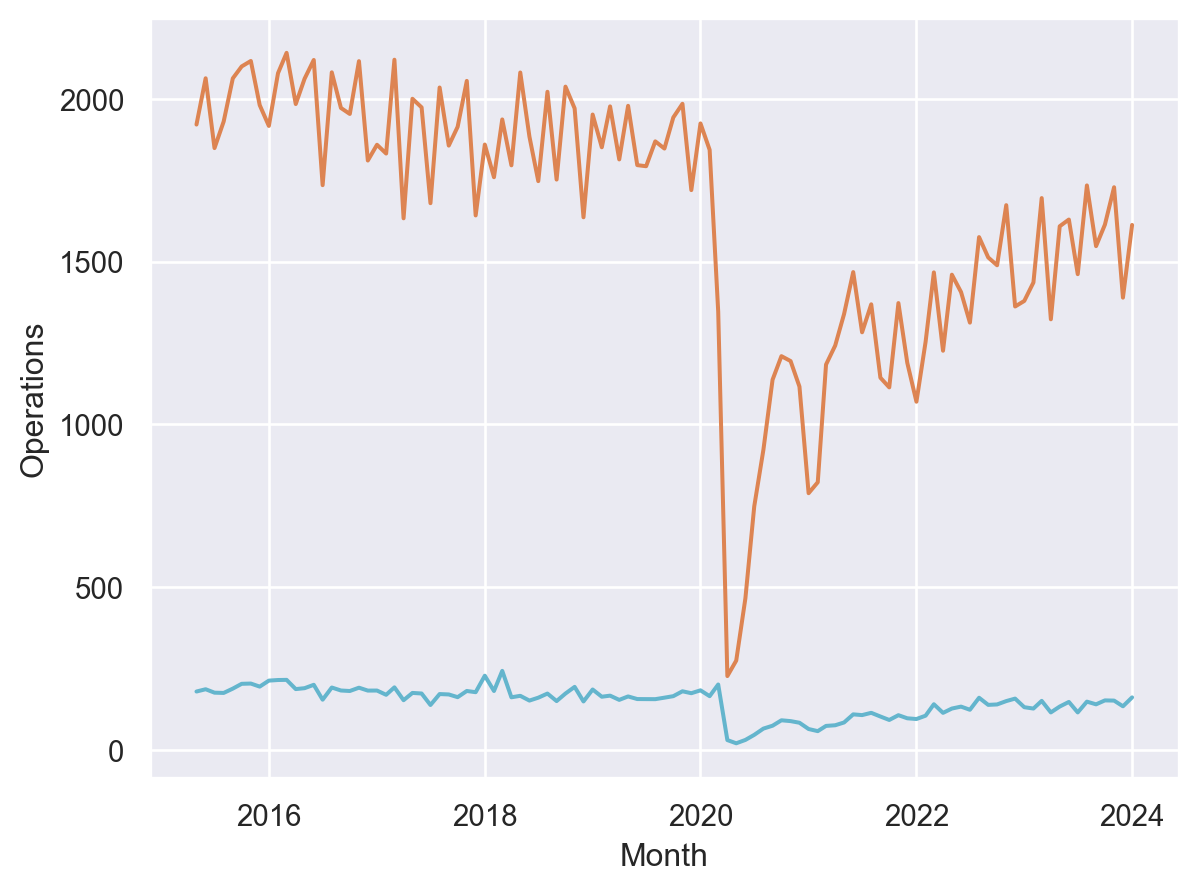

In [23]:
so.Plot(cancellations_hb, x="Month").add(so.Line(color="C1"), so.Agg(), y="TotalOperations", label="TotalOperations").add(so.Line(color="C9"), so.Agg(), y="TotalCancelled", label="TotalCancelled").label(y="Operations")

<Axes: xlabel='Season', ylabel='TotalCancelled'>

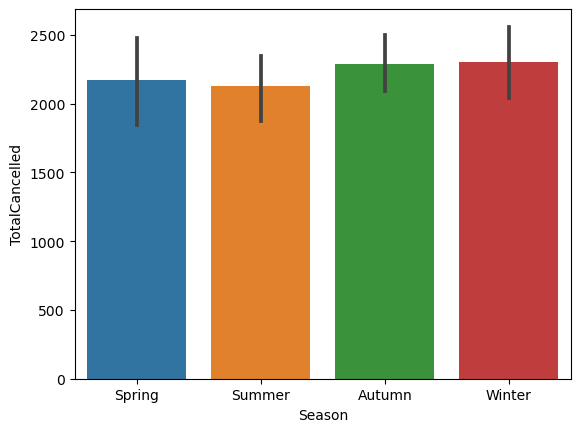

In [24]:
sns.barplot(data=cancel_scotland, x="Season", y="TotalCancelled")
# look at the plot and see that there is like a drop on planned operations during december or new years. mayeb we could use statiscial infrence to check if december receive more cancellations or not

<Axes: xlabel='Season', ylabel='NonClinicalCapacityReason'>

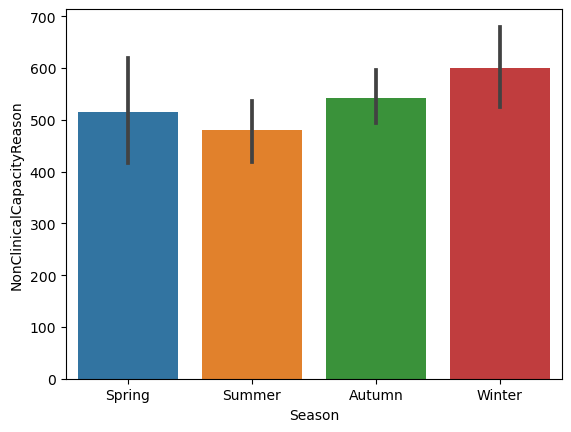

In [25]:
sns.barplot(data=cancel_scotland, x="Season", y="NonClinicalCapacityReason")
# here lets do this one also have research to back up that winter times 


<Axes: xlabel='Season', ylabel='CancelledByPatientReason'>

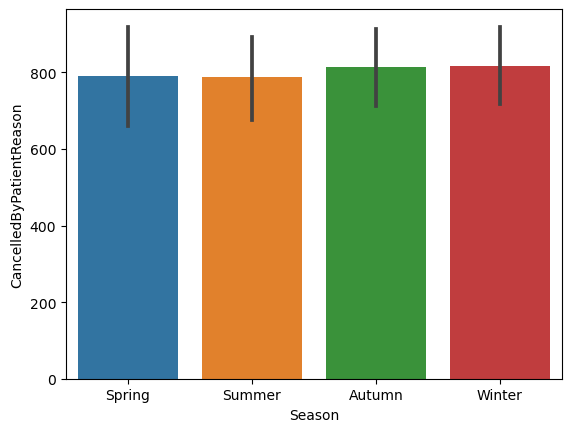

In [26]:
sns.barplot(data=cancel_scotland, x="Season", y="CancelledByPatientReason")

<Axes: xlabel='Season', ylabel='OtherReason'>

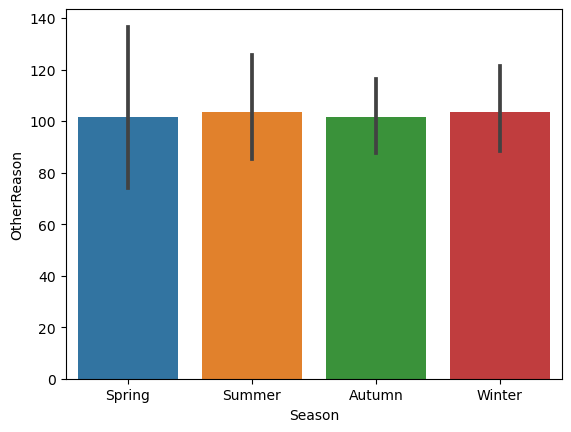

In [27]:
sns.barplot(data=cancel_scotland, x="Season", y="OtherReason")

<Axes: xlabel='Season', ylabel='ClinicalReason'>

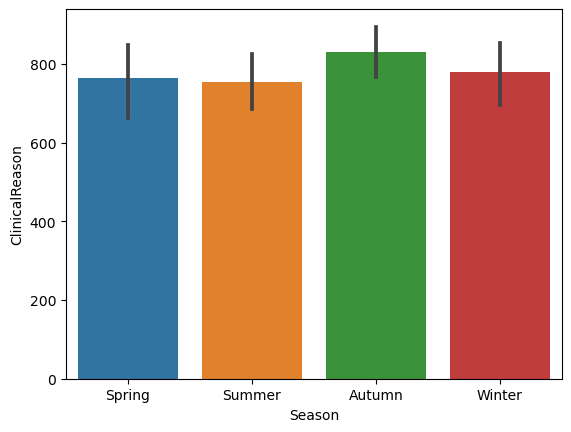

In [28]:
sns.barplot(data=cancel_scotland, x="Season", y="ClinicalReason")

In [29]:
seasonal = cancel_scotland.groupby("Season").sum()

seasonal.drop(columns = ["_id"], inplace = True)
seasonal

Autum = seasonal.loc["Autum"]
Summer = seasonal.loc["Summer"]
Winter = seasonal.loc["Winter"]
Spring = seasonal.loc["Spring"]

#Autum.plot(kind = "bar", figsize = (10,6))
#Spring.plot(kind = "bar", figsize = (10,6))
#Summer.plot(kind = "bar", figsize = (10,6))
#Winter.plot(kind = "bar", figsize = (10,6))
seasonal.plot(kind = "bar", figsize = (10,6))


plt.title('Total Operations and Cancellations')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()


#sns.barplot(data = Autum, x = "Columns",y = "Values")

/var/folders/16/jctzkwyn5k5gvk9tx998xk8h0000gn/T/ipykernel_75285/3895206950.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonal = cancel_scotland.groupby("Season").sum()


KeyError: 'Autum'

In [ ]:
Winter.plot(kind = "bar", figsize = (10,6))
plt.title('Total Operations and Cancellations in Winter')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.xticks(rotation=45)
for i, val in enumerate(Winter):
    plt.text(i, val, str(val), ha='center', va='bottom')
plt.show()


In [ ]:
Spring.plot(kind = "bar", figsize = (10,6))
plt.title('Total Operations and Cancellations in Spring')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, val in enumerate(Spring):
    plt.text(i, val, str(val), ha='center', va='bottom')
plt.show()

In [ ]:
Summer.plot(kind = "bar", figsize = (10,6))
plt.title('Total Operations and Cancellations in Summer')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, val in enumerate(Summer):
    plt.text(i, val, str(val), ha='center', va='bottom')
plt.show()

In [ ]:
Autum.plot(kind = "bar", figsize = (10,6))
plt.title('Total Operations and Cancellations in Autum')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, val in enumerate(Autum):
    plt.text(i, val, str(val), ha='center', va='bottom')
plt.show()

In [ ]:
cancellations_hospital

,_id,Month,Hospital,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,1,2015-05-01,A111H,884,67,21,25,16,5
1,2,2015-06-01,A111H,945,84,39,30,12,3
2,3,2015-07-01,A111H,948,72,25,33,6,8
3,4,2015-08-01,A111H,882,74,42,18,12,2
4,5,2015-09-01,A111H,845,67,32,30,3,2
...,...,...,...,...,...,...,...,...,...
4497,4498,2024-01-01,Z102H,164,27,16,3,8,0
4498,4499,2024-01-01,T101H,822,69,26,27,2,14
4499,4500,2024-01-01,T202H,336,22,4,11,1,6
4500,4501,2024-01-01,T312H,392,40,16,9,2,13


In [ ]:
hospital_names.drop(columns=["_id","AddressLine1","AddressLine2","AddressLine2QF","AddressLine3","AddressLine3QF","AddressLine4","AddressLine4QF","Postcode","HSCP","CouncilArea","IntermediateZone","DataZone"],inplace=True)
hospital_names_hbcode = hospital_names.merge(hb_names_all, left_on="HealthBoard", right_on="Health Board Code")
hospital_names_hbcode.drop(columns=["HealthBoard"], inplace=True)
hospital_names_hbcode.rename(columns={"HospitalCode":"Hospital"},inplace=True)

In [ ]:
cancellations_hospital = cancellations_hospital.merge(hospital_names_hbcode, on="Hospital")
cancellations_hospital.drop(columns=["_id"], inplace=True)